In [1]:
import pandas as pd
from datetime import datetime
from fbprophet import Prophet
import holidays

In [2]:
d0 = pd.read_csv("/Users/pranavprajapati/Desktop/Projects_2019/price_prediction/data/databed0.csv")

In [3]:
d0['last_modified']= pd.to_datetime(d0['last_modified'])

In [4]:
d0.info()
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33011 entries, 0 to 33010
Data columns (total 14 columns):
room_id                 33011 non-null int64
host_id                 33011 non-null float64
room_type               33011 non-null object
borough                 33011 non-null object
neighborhood            33011 non-null object
reviews                 33011 non-null int64
overall_satisfaction    21258 non-null float64
accommodates            32863 non-null float64
bedrooms                33011 non-null float64
price                   33011 non-null float64
minstay                 32367 non-null float64
latitude                33011 non-null float64
longitude               33011 non-null float64
last_modified           33011 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2), object(3)
memory usage: 3.5+ MB


In [5]:
d0['last_modified'] = d0['last_modified'].dt.strftime('%Y-%m-%d')

In [6]:
d0['last_modified'].head()

0    2016-01-24
1    2016-01-24
2    2016-01-24
3    2016-01-24
4    2016-01-24
Name: last_modified, dtype: object

In [7]:
d0s = d0[['last_modified','price']]

In [8]:
d0s = d0s.sort_values(by='last_modified')

In [9]:
d0s.isna().sum()

last_modified    0
price            0
dtype: int64

In [10]:
d0s = d0s.rename(index=str, columns={"last_modified": "ds", "price": "y"})

In [17]:
d0s.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33011 entries, 1980 to 8338
Data columns (total 2 columns):
ds    33011 non-null object
y     33011 non-null float64
dtypes: float64(1), object(1)
memory usage: 773.7+ KB


In [25]:
d0s = d0s[d0s.y < 300]

In [26]:
d0s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31945 entries, 1980 to 8338
Data columns (total 2 columns):
ds    31945 non-null object
y     31945 non-null float64
dtypes: float64(1), object(1)
memory usage: 748.7+ KB


In [32]:
m = Prophet(changepoint_prior_scale=0.75)
m.fit(d0s)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
32305,2017-10-21
32306,2017-10-22
32307,2017-10-23
32308,2017-10-24
32309,2017-10-25


In [36]:
forecast = m.predict(future)



,ds,yhat,yhat_lower,yhat_upper
32305,2017-10-21,168.598238,92.319797,246.255135
32306,2017-10-22,168.283153,92.863795,244.305417
32307,2017-10-23,169.670655,101.563380,250.609497
32308,2017-10-24,170.385919,101.276040,249.043932
32309,2017-10-25,171.209724,98.045294,247.195167


In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32305,2017-10-21,168.598238,92.319797,246.255135
32306,2017-10-22,168.283153,92.863795,244.305417
32307,2017-10-23,169.670655,101.563380,250.609497
32308,2017-10-24,170.385919,101.276040,249.043932
32309,2017-10-25,171.209724,98.045294,247.195167


In [41]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-21,146.843293,81.232450,207.720261
1,2016-01-21,146.843293,82.028488,214.436382
2,2016-01-21,146.843293,83.534834,211.319728
3,2016-01-21,146.843293,81.121421,211.873178
4,2016-01-21,146.843293,85.539775,212.020939


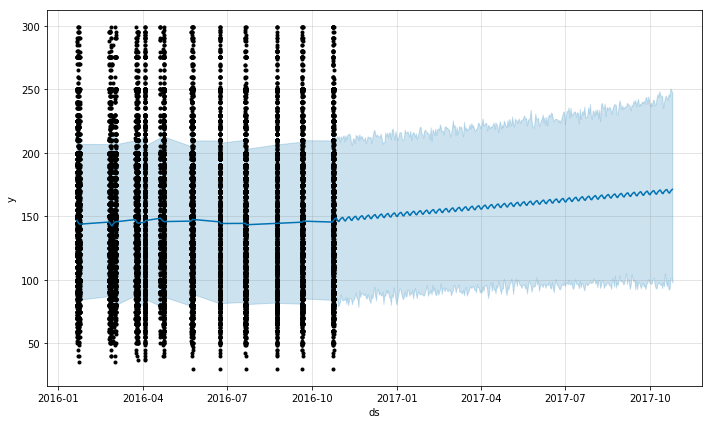

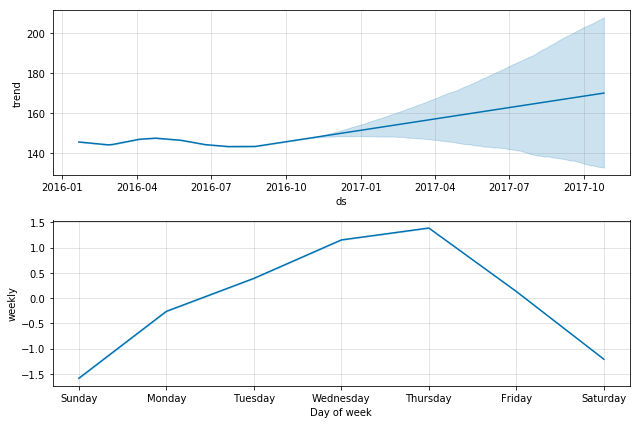

In [37]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


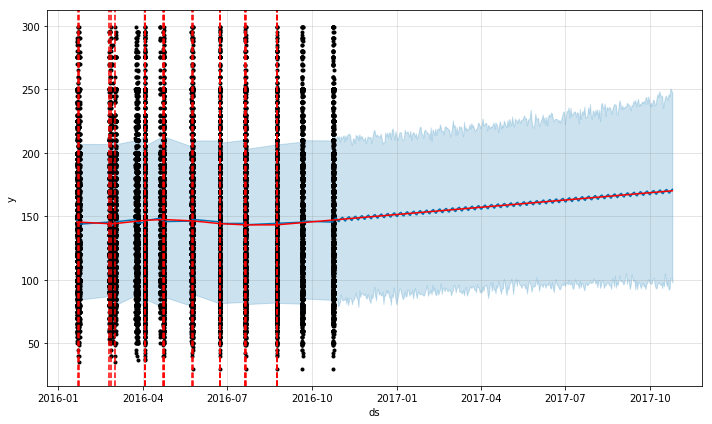

In [38]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)